## OBJ;
- using pydap library to get access to OPENDAP source to retrieve OCO files
- plotting the points using BASEMAP

In [10]:
## libraries for data access and pre-processing
## preprocessing: retireve data from netCDF and convert to pandas columns
import netCDF4 # packages to open 'netcdf' file
import numpy as np # numpy and pandas packages to pre-process the dataset
import pandas as pd

# for visualization 
import matplotlib.pyplot as plt # to create plots and graphs
from mpl_toolkits.basemap import Basemap # to create geo-spatial map, requires dependencies installation
import plotly.express as px
import matplotlib.patches as mpatches
import matplotlib as mpl
import matplotlib.animation as animation
from matplotlib.collections import PatchCollection
import time
import matplotlib

# to load webcontent and retrieve data from link
from IPython.display import display, HTML
from IPython import display
from datetime import datetime

In [11]:
# WEB SCRAP the contents
import re
# to grab data from entire year, month
from bs4 import BeautifulSoup # 

In [12]:
# Data ACCESS from OPENDAD source
## Libraries
from urllib import request, parse
import getpass
import netrc
import os
import requests
import matplotlib.image as mpimg
import os
import time
from netCDF4 import Dataset

# pydap library to open session
from pydap import client
from pydap.cas.urs import setup_session
from pydap.client import open_url

import json

# FUNCTIONS: 
1. Creates a pydap session
2. opens up netCDF files retrieved from the OPENDAP source
3. plots the data using BASEMAP

## 1. Creates a pydap session

In [13]:
def get_session(url, file_name):
    """
    Creating a session with url and filename in openDap for data retrieval
    https://oco2.gesdisc.eosdis.nasa.gov/opendap/
    """
    try:
        login_credentials= 'uat.urs.earthdata.nasa.gov'
        username, _, password = netrc.netrc().authenticators(login_credentials)
    except (FileNotFoundError, TypeError):
        # FileNotFound = There's no .netrc file
        # TypeError = The endpoint isn't in the netrc file, causing the above to try unpacking None
        print('\n*******************************************\n')
        print('Please provide your Earthdata Login credentials to allow data access\n')
        print('Your credentials will only be passed to %s and will not be exposed in Jupyter' % (url))
        print('\n')
        username = input('Username:')
        password = getpass.getpass()
        print('\n*******************************************\n')
        
    # pydap session
    session = setup_session(username, password, check_url= url + file_name)
    
    # using the session to get access the data
    return session

## 2. opens up netCDF files retrieved from the OPENDAP source

In [14]:
def open_netcdf(url, file_name):
    
    # get session from the URL and filename
    session= get_session(url, file_name)
    
    # open the netcdf file and store in dataframe
    pydap_df= open_url(url+file_name, session = session)
    
    # Data preprocessing with new column names from the variables
    # Note: reformating requires for datetime
    
    df_xco2= pd.DataFrame(columns=[ "Latitude", "Longitude", "xco2", "xco2_quality_flag"])
    
    df_xco2["Xco2"]= pydap_df["xco2"][:]
    #df_xco2["DateTime"]= pydap_df["date"][:]
    df_xco2["Latitude"]= pydap_df["latitude"][:]
    df_xco2["Longitude"]= pydap_df["longitude"][:]
    df_xco2["xco2_quality_flag"]= pydap_df["xco2_quality_flag"][:]
    
    df_xco2["Longitude_vertices"]= list(pydap_df["vertex_longitude"][:])
    df_xco2["Latitude_vertices"]= list(pydap_df["vertex_latitude"][:])
    
    # filter the qual flag
    #df_xco2= df_xco2[df_xco2["xco2_quality_flag"] == 0]
    
    # convert data type
#     df_xco2= df_xco2.astype(float)
    
    return df_xco2.round(3)

## TESTING::
- create individual functions
- create packages

## Enter the information and credentials

In [18]:
%matplotlib notebook

Enter the Year: 2020
Enter the Month: 08
Enter the version: 11

*******************************************

Please provide your Earthdata Login credentials to allow data access

Your credentials will only be passed to https://oco2.gesdisc.eosdis.nasa.gov/opendap and will not be exposed in Jupyter


Username:sagarlimbu
········

*******************************************

*******************************

Example: single filename:

/OCO2_L2_Lite_FP.11r/2020/oco2_LtCO2_200101_B11014Ar_220902231034s.nc4
*******************************

Printing the First three rows:



<IPython.core.display.Javascript object>


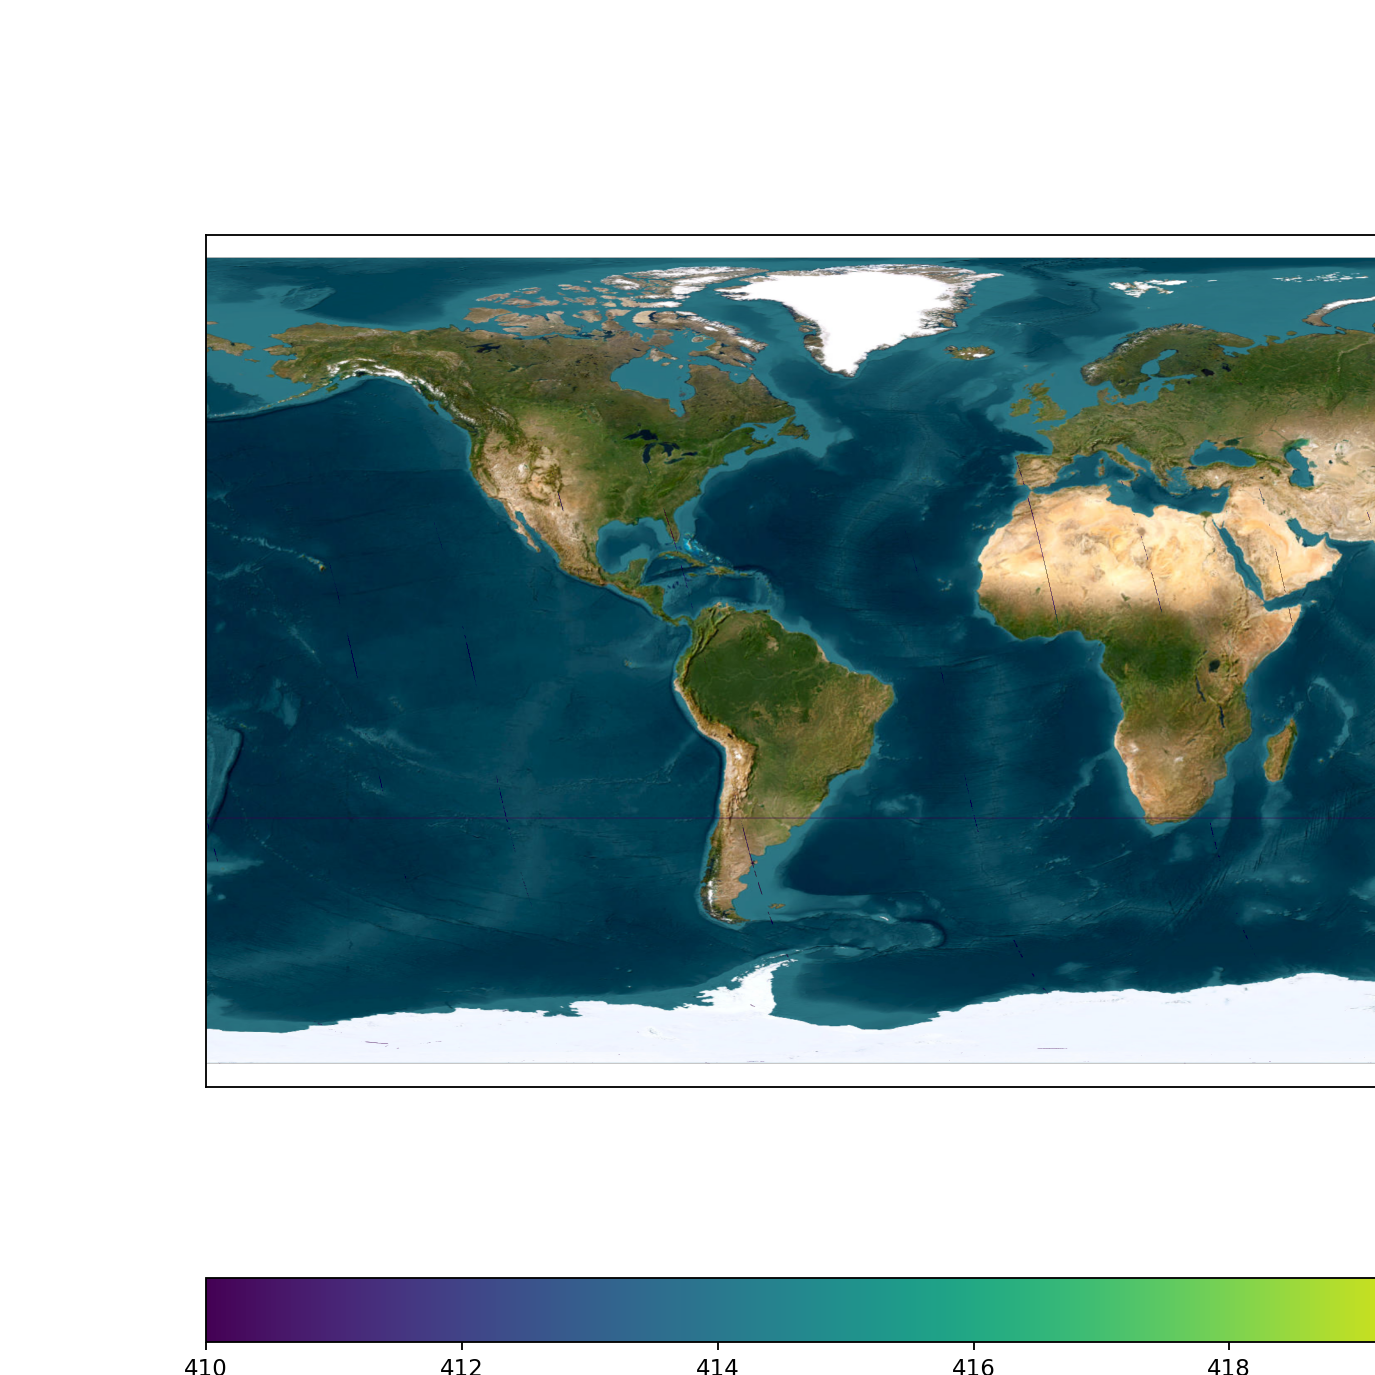

C:\Users\sagarl\AppData\Roaming\Python\Python39\site-packages\pyproj\crs\crs.py:130: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


Wall time: 1min


In [20]:
%%time
## INPUT for specified year, version of file
# SOURCE :"https://oco2.gesdisc.eosdis.nasa.gov/opendap/OCO2_L2_Lite_FP.11r/2019/oco2_LtCO2_190107_B11014Ar_221017171018s.nc4.html"

year= input("Enter the Year: ")
month= input("Enter the Month: ")
ver_= input("Enter the version: ")
lite_file= '/OCO2_L2_Lite_FP.'+ str(ver_)+ 'r' +'/'+ year 
#+ '/' + 'oco2_LtCO2' 

main_url='https://oco2.gesdisc.eosdis.nasa.gov/opendap'
content= '/contents.html'

s= requests.get(main_url + lite_file + content)

# Scrap the content by specified URL
soup= BeautifulSoup(s.content, 'html.parser')


########################################################################
# GET THE files from OpenDap source
# open the netcdf file and store in dataframe
# Regex applying on href LINKS
# Beautiful soup to retrieve all data for the MONTH
# EXAMPLE: in this test, we will use SINGLE file of the month
########################################################################

list_files=[]
# html_links= soup.select('a[href$=".nc4.html"]')

html_links= soup.select('a[href$=".nc4.html"]')

for link in html_links:
    list_files.append(link['href'])
#     print(link['href'])
    
    
## CLEAN the files
# removing last strings '.html' to download the files from PYDAP library
files_oco2= [f[:-5] for f in list_files]

# total_files= ['opendap'+lite_file+'/'+ f for f in files_oco2[:3]]
total_files= [lite_file+'/'+ f for f in files_oco2[:3]]


########################################################################
# GET THE files from OpenDap source
# open the netcdf file and store in dataframe
# EXAMPLE: SINGLE file of the month
########################################################################

pydap_df= open_netcdf(main_url, total_files[1])

print('*******************************\n')
print("Example: single filename:\n")
print(total_files[1])
print('*******************************\n')
print("Printing the First three rows:\n")
# 

########################################################################
# Pre-process the data
########################################################################

df= pydap_df
flat_vert=[]
for j in range(len(df)):
    flat_vert.append(np.dstack([ np.array(df['Longitude_vertices'][j]), np.array(df['Latitude_vertices'][j]) ]))

# flat_verterices SHAPE from MULTI-dimensional shape
unpack_vert= [element for sublist in flat_vert for element in sublist]


########################################################################
# Create patches to pass on Matplotlib polygon
# add as a list of polygon shapes
########################################################################

patches_total= []

for row in unpack_vert:
    polygon= mpatches.Polygon(row)
    patches_total.append(polygon)
    
# XCO2 total
xco2_total= pydap_df["Xco2"][:]

########################################################################
# PLOT using the PATCHES matplotlib, on basemap library
########################################################################

fig= plt.figure(111)
ax= fig.add_subplot(111)

xco2_min_= 410
xco2_max_= 420

# world map: 
# set the boundaries
llcrnrlon, urcrnrlon, llcrnrlat, urcrnrlat= -180, 90, -90, 90 


# ###worldmap (FULL_OUTER_MAP)

m= Basemap(projection= 'cyl',
        llcrnrlon= llcrnrlon,
        urcrnrlon= urcrnrlon,
        llcrnrlat= llcrnrlat,
        urcrnrlat= urcrnrlat,   
        resolution='l', 
        epsg= 4269
        )

#m.fillcontinents(color='#191919',lake_color='#000000') # dark grey land, black lakes
#m.drawmapboundary(fill_color='#000000') 


### ArcGIS map
m.arcgisimage(server='http://server.arcgisonline.com/ArcGIS', 
              #service='World_Shaded_Relief', 
              service='World_Imagery',
              xpixels=2000, ypixels=None, dpi= 2000, verbose=False)


cmap= plt.get_cmap('viridis')
colors= cmap(xco2_total)

## normalize
norm= matplotlib.colors.Normalize(vmin= xco2_min_,
                                 vmax= xco2_max_)

## patch collection and plt show
p= PatchCollection(patches_total,
                   cmap= matplotlib.cm.viridis, 
                   #alpha= 0.95, 
                  # linewidths= 4
                   edgecolor='none',
                   norm= norm
                  )

# set color range from XCO2
#p.set_color(colors)
p.set_array(xco2_total)
#p.set_clim(np.min(xco2), np.max(xco2))

plt.gcf().set_size_inches(10, 10)
ax.add_collection(p)

## COLOR bar
cmap = mpl.cm.viridis
norm = mpl.colors.Normalize(vmin=xco2_min_, vmax=xco2_max_)


cbar= plt.colorbar(mpl.cm.ScalarMappable(norm=norm, cmap=cmap),
                   orientation='horizontal', label='OCO3 and OCO2, XCO2 ppm\nMonths: ')
#                   + str(months_sel))
#    plt.savefig('dark'+str(year)+'_'+str(months_sel)+"_oco2_oco3_comb.jpg", dpi= 3500, bbox_inches='tight', pad_inches= 2)
plt.show();
